Importing the library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import joblib

Importing the datasets

In [2]:
df=pd.read_csv("/content/drive/MyDrive/(Final)AgricultureFertilizerdatasets.csv")
df.head()

,Item,Year,Area Harvested (ha),Production (t),Yield (kg/ha),Nutrient nitrogen N (t),Nutrient phosphate P2O5 (t),Nutrient potash K2O (t)
0,"Almonds, in shell",2000,20.0,20.0,1000.0,0.077711,0.027261,0.004626
1,"Almonds, in shell",2001,11.0,11.0,1000.0,0.037411,0.019427,0.000641
2,"Almonds, in shell",2002,11.0,11.0,1000.0,0.016781,0.011782,0.001368
3,"Almonds, in shell",2003,11.0,11.0,1000.0,0.003968,0.003799,0.000735
4,"Almonds, in shell",2004,11.0,11.0,1000.0,0.005858,0.006452,0.001010


Excluding the irrelevant column

In [3]:
df.drop(["Year","Yield (kg/ha)"],axis=1, inplace=True)
df.head()


,Item,Area Harvested (ha),Production (t),Nutrient nitrogen N (t),Nutrient phosphate P2O5 (t),Nutrient potash K2O (t)
0,"Almonds, in shell",20.0,20.0,0.077711,0.027261,0.004626
1,"Almonds, in shell",11.0,11.0,0.037411,0.019427,0.000641
2,"Almonds, in shell",11.0,11.0,0.016781,0.011782,0.001368
3,"Almonds, in shell",11.0,11.0,0.003968,0.003799,0.000735
4,"Almonds, in shell",11.0,11.0,0.005858,0.006452,0.001010


Checking for null and duplicated values

In [4]:
print("------------Check NUll Values -----------------")
print(df.isna().sum())
print("--Duplicated Values--")
print(df.duplicated().sum())


------------Check NUll Values -----------------
Item                             0
Area Harvested (ha)             36
Production (t)                  36
Nutrient nitrogen N (t)         90
Nutrient phosphate P2O5 (t)     90
Nutrient potash K2O (t)        141
dtype: int64
--Duplicated Values--
31


Filling missing value

In [5]:
def fillnull(df, col):
    df[col] = df[col].fillna(df[col].median())

input_columns = ["Area Harvested (ha)", "Production (t)"]
output_columns = ["Nutrient nitrogen N (t)","Nutrient phosphate P2O5 (t)", "Nutrient potash K2O (t)",]

for col in input_columns + output_columns:
    fillnull(df, col)


In [6]:
print("------------Check NUll Values -----------------")
print(df.isna().sum())
print("--Duplicated Values--")
print(df.duplicated().sum())


------------Check NUll Values -----------------
Item                           0
Area Harvested (ha)            0
Production (t)                 0
Nutrient nitrogen N (t)        0
Nutrient phosphate P2O5 (t)    0
Nutrient potash K2O (t)        0
dtype: int64
--Duplicated Values--
31


In [7]:
df.drop_duplicates(inplace=True)
print("--Duplicated Values--")
print(df.duplicated().sum())

--Duplicated Values--
0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1265 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item                         1265 non-null   object 
 1   Area Harvested (ha)          1265 non-null   float64
 2   Production (t)               1265 non-null   float64
 3   Nutrient nitrogen N (t)      1265 non-null   float64
 4   Nutrient phosphate P2O5 (t)  1265 non-null   float64
 5   Nutrient potash K2O (t)      1265 non-null   float64
dtypes: float64(5), object(1)
memory usage: 69.2+ KB


Removing the outliers using IQR Method

In [9]:
numeric_cols = ['Area Harvested (ha)', 'Production (t)','Nutrient nitrogen N (t)', 'Nutrient phosphate P2O5 (t)', 'Nutrient potash K2O (t)']

# Filter out outliers based on IQR for each column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 0 to 1271
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Item                         765 non-null    object 
 1   Area Harvested (ha)          765 non-null    float64
 2   Production (t)               765 non-null    float64
 3   Nutrient nitrogen N (t)      765 non-null    float64
 4   Nutrient phosphate P2O5 (t)  765 non-null    float64
 5   Nutrient potash K2O (t)      765 non-null    float64
dtypes: float64(5), object(1)
memory usage: 41.8+ KB


In [11]:
df.head()

,Item,Area Harvested (ha),Production (t),Nutrient nitrogen N (t),Nutrient phosphate P2O5 (t),Nutrient potash K2O (t)
0,"Almonds, in shell",20.0,20.0,0.077711,0.027261,0.004626
1,"Almonds, in shell",11.0,11.0,0.037411,0.019427,0.000641
2,"Almonds, in shell",11.0,11.0,0.016781,0.011782,0.001368
3,"Almonds, in shell",11.0,11.0,0.003968,0.003799,0.000735
4,"Almonds, in shell",11.0,11.0,0.005858,0.006452,0.001010


Encoding categorical column with one hot encoding

In [12]:
df = pd.get_dummies(df, columns=['Item'])
df.columns = df.columns.str.replace('Item_', '', regex=False)
df.head()


,Area Harvested (ha),Production (t),Nutrient nitrogen N (t),Nutrient phosphate P2O5 (t),Nutrient potash K2O (t),"Almonds, in shell",Apples,Apricots,Areca nuts,Bananas,...,Pears,Persimmons,"Pigeon peas, dry",Pineapples,Plums and sloes,"Seed cotton, unginned",Soya beans,Tea leaves,Unmanufactured tobacco,"Walnuts, in shell"
0,20.0,20.0,0.077711,0.027261,0.004626,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,11.0,11.0,0.037411,0.019427,0.000641,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11.0,11.0,0.016781,0.011782,0.001368,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11.0,11.0,0.003968,0.003799,0.000735,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,11.0,11.0,0.005858,0.006452,0.001010,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Saving the columns name for the web use

In [13]:
input_columns_names = df.drop(output_columns, axis=1).columns.tolist()
print(input_columns_names)
joblib.dump(input_columns_names, "input_columns_names.pkl")


['Area Harvested (ha)', 'Production (t)', 'Almonds, in shell', 'Apples', 'Apricots', 'Areca nuts', 'Bananas', 'Barley', 'Beans, dry', 'Broad beans and horse beans, dry', 'Buckwheat', 'Cabbages', 'Cauliflowers and broccoli', 'Chick peas, dry', 'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw', 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)', 'Coconuts, in shell', 'Coffee, green', 'Green garlic', 'Jute, raw or retted', 'Lemons and limes', 'Lettuce and chicory', 'Linseed', 'Nutmeg, mace, cardamoms, raw', 'Oranges', 'Other beans, green', 'Other citrus fruit, n.e.c.', 'Other oil seeds, n.e.c.', 'Other pulses n.e.c.', 'Other stimulant, spice and aromatic crops, n.e.c.', 'Papayas', 'Peaches and nectarines', 'Pears', 'Persimmons', 'Pigeon peas, dry', 'Pineapples', 'Plums and sloes', 'Seed cotton, unginned', 'Soya beans', 'Tea leaves', 'Unmanufactured tobacco', 'Walnuts, in shell']


['input_columns_names.pkl']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 0 to 1271
Data columns (total 45 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Area Harvested (ha)                                           765 non-null    float64
 1   Production (t)                                                765 non-null    float64
 2   Nutrient nitrogen N (t)                                       765 non-null    float64
 3   Nutrient phosphate P2O5 (t)                                   765 non-null    float64
 4   Nutrient potash K2O (t)                                       765 non-null    float64
 5   Almonds, in shell                                             765 non-null    bool   
 6   Apples                                                        765 non-null    bool   
 7   Apricots                                                      765 non-null 

Converting Boolean Columns to Float

In [15]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype('float64')
df.head()

,Area Harvested (ha),Production (t),Nutrient nitrogen N (t),Nutrient phosphate P2O5 (t),Nutrient potash K2O (t),"Almonds, in shell",Apples,Apricots,Areca nuts,Bananas,...,Pears,Persimmons,"Pigeon peas, dry",Pineapples,Plums and sloes,"Seed cotton, unginned",Soya beans,Tea leaves,Unmanufactured tobacco,"Walnuts, in shell"
0,20.0,20.0,0.077711,0.027261,0.004626,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,11.0,0.037411,0.019427,0.000641,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.0,11.0,0.016781,0.011782,0.001368,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.0,11.0,0.003968,0.003799,0.000735,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.0,11.0,0.005858,0.006452,0.001010,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 765 entries, 0 to 1271
Data columns (total 45 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Area Harvested (ha)                                           765 non-null    float64
 1   Production (t)                                                765 non-null    float64
 2   Nutrient nitrogen N (t)                                       765 non-null    float64
 3   Nutrient phosphate P2O5 (t)                                   765 non-null    float64
 4   Nutrient potash K2O (t)                                       765 non-null    float64
 5   Almonds, in shell                                             765 non-null    float64
 6   Apples                                                        765 non-null    float64
 7   Apricots                                                      765 non-null 

Train-Test-Split

In [17]:
from sklearn.model_selection import train_test_split
y = pd.DataFrame()
for col in output_columns:
    y[col] = df.pop(col)
X=df.copy()
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [18]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (612, 42)
X_val shape: (77, 42)
X_test shape: (76, 42)
y_train shape: (612, 3)
y_val shape: (77, 3)
y_test shape: (76, 3)


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612 entries, 470 to 143
Data columns (total 42 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Area Harvested (ha)                                           612 non-null    float64
 1   Production (t)                                                612 non-null    float64
 2   Almonds, in shell                                             612 non-null    float64
 3   Apples                                                        612 non-null    float64
 4   Apricots                                                      612 non-null    float64
 5   Areca nuts                                                    612 non-null    float64
 6   Bananas                                                       612 non-null    float64
 7   Barley                                                        612 non-null

In [20]:
X_train.head()

,Area Harvested (ha),Production (t),"Almonds, in shell",Apples,Apricots,Areca nuts,Bananas,Barley,"Beans, dry","Broad beans and horse beans, dry",...,Pears,Persimmons,"Pigeon peas, dry",Pineapples,Plums and sloes,"Seed cotton, unginned",Soya beans,Tea leaves,Unmanufactured tobacco,"Walnuts, in shell"
470,11350.0,14890.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1124,135.0,133.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
366,1285.0,300.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1123,126.0,126.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
104,4992.0,76792.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Scaling the dataset

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['Area Harvested (ha)', 'Production (t)']] = scaler.fit_transform(X_train[['Area Harvested (ha)', 'Production (t)']])
X_val[['Area Harvested (ha)', 'Production (t)']] = scaler.transform(X_val[['Area Harvested (ha)', 'Production (t)']])
X_test[['Area Harvested (ha)', 'Production (t)']] = scaler.transform(X_test[['Area Harvested (ha)', 'Production (t)']])
X_train.head()
joblib.dump(scaler,"scaler.pkl")



['scaler.pkl']

Defining the early function

In [22]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

Defining the deep neural network architecture

In [23]:
input_shape = [X_train.shape[1]]
model = keras.Sequential([
    layers.Dense(1000, activation='relu', input_shape=input_shape),
    layers.Dense(800, activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(400,activation='relu'),
    layers.Dense(200,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dense(25,activation='relu'),
    layers.Dense(12,activation='relu'),
    layers.Dense(6,activation='relu'),
    layers.Dense(3)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        43,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 800)            │       800,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       400,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 400)            │       200,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,551,736 (5.92 MB)

 Trainable params: 1,551,736 (5.92 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss='mse'
)

Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - loss: 502.9459 - val_loss: 322.1397
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 249.1714 - val_loss: 300.2948
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 216.0830 - val_loss: 337.8396
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 204.9992 - val_loss: 309.6755
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 190.2273 - val_loss: 278.4920
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 199.2720 - val_loss: 255.3838
Epoch 7/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 177.4471 - val_loss: 266.1039
Epoch 8/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 180.6467 - val_loss: 273.4473
Epoch 9/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 146.3735 - val_loss: 259.0771
Epoch 10/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 179.9734 - val_loss: 231.6996
Epoch 11/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 161.2483 - val_loss: 303.3592
Epoch 1

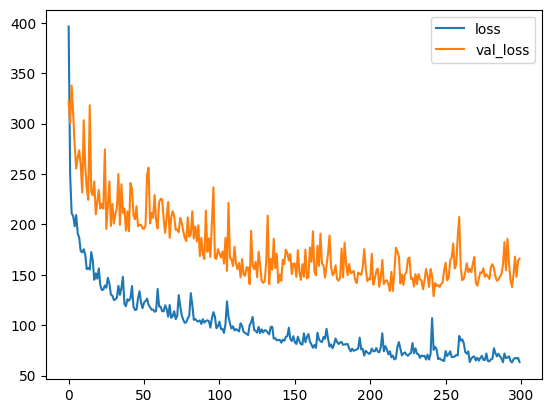

In [26]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=300,
    verbose=1
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
MAE: 6.378749847412109
MSE: 148.7172393798828
R² Score: 0.413901686668396


Evaluating Model Performance on the Test Set

In [28]:
scores=model.evaluate(X_test,y_test)
print("Test Loss:",scores)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 124.2303
Test Loss: 148.7172393798828


Saving the Trained Keras Model

In [29]:
model.save("fertilizer_prediction.keras")

Predicting the values

In [30]:
scaler = joblib.load("/content/scaler.pkl")
input_columns = joblib.load("/content/input_columns_names.pkl")

In [31]:
new_input = {
    "Item": "Almonds, in shell",                      # Item name
    "Area Harvested (ha)": 20.0,
    "Production (t)": 20.0
}
print(input_columns)
input_df = pd.DataFrame([new_input])

# Apply get_dummies
input_df = pd.get_dummies(input_df, columns=["Item"])

# Clean column names if needed
input_df.columns = input_df.columns.str.replace("Item_", "", regex=False)
input_df.head()
for col in input_columns:
    if col not in input_df.columns:
        input_df[col] = 0

# Ensure correct column order
input_df = input_df[input_columns]
input_df[input_df.select_dtypes(include='bool').columns] = input_df.select_dtypes(include='bool').astype('float64')
input_df.head()


['Area Harvested (ha)', 'Production (t)', 'Almonds, in shell', 'Apples', 'Apricots', 'Areca nuts', 'Bananas', 'Barley', 'Beans, dry', 'Broad beans and horse beans, dry', 'Buckwheat', 'Cabbages', 'Cauliflowers and broccoli', 'Chick peas, dry', 'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw', 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)', 'Coconuts, in shell', 'Coffee, green', 'Green garlic', 'Jute, raw or retted', 'Lemons and limes', 'Lettuce and chicory', 'Linseed', 'Nutmeg, mace, cardamoms, raw', 'Oranges', 'Other beans, green', 'Other citrus fruit, n.e.c.', 'Other oil seeds, n.e.c.', 'Other pulses n.e.c.', 'Other stimulant, spice and aromatic crops, n.e.c.', 'Papayas', 'Peaches and nectarines', 'Pears', 'Persimmons', 'Pigeon peas, dry', 'Pineapples', 'Plums and sloes', 'Seed cotton, unginned', 'Soya beans', 'Tea leaves', 'Unmanufactured tobacco', 'Walnuts, in shell']


,Area Harvested (ha),Production (t),"Almonds, in shell",Apples,Apricots,Areca nuts,Bananas,Barley,"Beans, dry","Broad beans and horse beans, dry",...,Pears,Persimmons,"Pigeon peas, dry",Pineapples,Plums and sloes,"Seed cotton, unginned",Soya beans,Tea leaves,Unmanufactured tobacco,"Walnuts, in shell"
0,20.0,20.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
input_df[['Area Harvested (ha)', 'Production (t)']] = scaler.transform(
    input_df[['Area Harvested (ha)', 'Production (t)']]
)
input_df.head()

,Area Harvested (ha),Production (t),"Almonds, in shell",Apples,Apricots,Areca nuts,Bananas,Barley,"Beans, dry","Broad beans and horse beans, dry",...,Pears,Persimmons,"Pigeon peas, dry",Pineapples,Plums and sloes,"Seed cotton, unginned",Soya beans,Tea leaves,Unmanufactured tobacco,"Walnuts, in shell"
0,-0.740605,-0.97881,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
prediction = model.predict(input_df)[0]
print(type(prediction))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
<class 'numpy.ndarray'>
[0.18094014 0.07166994 0.16717374]


In [34]:
print("Predicted Fertilizer Quantities:")
print(f"Nitrogen (N):  {prediction[0]:.4f} tons")
print(f"Phosphate (P₂O₅): {prediction[1]:.4f} tons")
print(f"Potash (K₂O):  {prediction[2]:.4f} tons")


Predicted Fertilizer Quantities:
Nitrogen (N):  0.1809 tons
Phosphate (P₂O₅): 0.0717 tons
Potash (K₂O):  0.1672 tons
